# Identification

Name: Renan Ryu Kajihara

NUSP: 14605762

# Name of the dataset
Dataset: Tabela de ocorrências aeronáuticas

# Abstract
O dataset mostra a ocorrência de acidentes e incidentes aeronáuticos que ocorreram no Brasil, sendo tais dados gerenciados pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA).

Tal dataset possui informações relevantes sobre a data, local, horário, aeronave envolvida e fatores contribuentes sobre os acidentes aéreos.

#Perguntas

1) Qual região do país possui um maior número de acidentes aéreos? E qual estado?

2) Qual horário ocorrem mais acidentes aéreos. Eles são mais comuns no período da madrugada, da manhã, da tarde ou da noite?

3) Qual nível de dano médio encontrado em tais acidentes?

4) Qual tipo de motor utilizado na maioria das aeronaves acidentadas?

5) Qual aspecto foi responsável pelo maior número de acidentes?

# EDA strategy

Para estudar este dataset, serão utilizadas diferentes formas de visualização dos dados, como gráficos de barras, gráficos de linhas, gráficos de setores e tabelas que auxiliem na compreensão dos dados, com o objetivo de que tais representações contribuam para a formulação de hipóteses e respostas às perguntas acima.


#Importação dos datasets

Para responder as perguntas, utilizaremos 3 datasets:

- ocorrencias.csv, que dá um parâmetro geral sobre o acidente, tendo como informações mais relevantes a data, o local e o horário do acidente;

- aeronave.csv, que traz informações sobre a aerenove envolvida no acidente;

- fator_contribuente.csv, que traz informações sobre os fatores responsáveis pelo acidente.

In [ ]:
import pandas as pd
import io
import requests
from matplotlib import pyplot as plt
import seaborn as sns

url = 'https://drive.google.com/uc?export=download&id=1VYO2c-9ZLtEp6Ofj-vwtohhu1kvVhOO5'
response = requests.get(url)
data = response.text

data = data.replace(',', '.')

ocor = pd.read_csv(io.StringIO(data), sep=';') #ocorrencia.csv

In [ ]:
ocor.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,83097,83097,83097,83097,83097,ACIDENTE,-2.352.777.777.777,-4.563.944.444.444,PARAIBUNA,SP,...,31/12/2023,18:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,83085,83085,83085,83085,83085,INCIDENTE,-9.868.333.333.333,-6.789.805.555.555,RIO BRANCO,AC,...,13/12/2023,11:33:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
2,83074,83074,83074,83074,83074,INCIDENTE,-1.962.444.444.444,-4.397.194.444.444,BELO HORIZONTE,MG,...,20/12/2023,20:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
3,83063,83063,83063,83063,83063,INCIDENTE,-1.587.111.111.111,-4.791.861.111.111,BRASÍLIA,DF,...,29/12/2023,21:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,83051,83051,83051,83051,83051,INCIDENTE,-4.871.388.888.888,-668.975,CARAUARI,AM,...,09/12/2023,18:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [ ]:

url = 'https://drive.google.com/uc?export=download&id=1_IvlYnqXv77YOl9IqGZT6AicQQBX8XG6'
response = requests.get(url)
data = response.text

data = data.replace(',', '.')

aero = pd.read_csv(io.StringIO(data), sep=';') #aeronave.csv

In [ ]:
aero.head()

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,83097,PRHDB,***,HELICÓPTERO,ROBINSON HELICOPTER,R44,R44,PISTÃO,MONOMOTOR,1088,...,BRASIL,BRASIL,HELICÓPTERO,PARTICULAR,CAMPO DE MARTE - SP,MAROUM,CRUZEIRO,***,SUBSTANCIAL,4
1,83085,PTEEK,***,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,...,BRASIL,BRASIL,AVIÃO,TÁXI AÉREO,FAZENDA ÁGUA LIMPA,PLÁCIDO DE CASTRO,TÁXI,NÃO REGULAR,LEVE,0
2,83074,PSAEN,***,AVIÃO,EMBRAER,ERJ 190-400,E295,JATO,BIMOTOR,61200,...,BRASIL,BRASIL,AVIÃO,REGULAR,VIRACOPOS,TANCREDO NEVES,INDETERMINADA,REGULAR,NENHUM,0
3,83063,PRGZW,***,AVIÃO,BOEING COMPANY,737-86N,B738,NaN,BIMOTOR,79015,...,BRASIL,BRASIL,AVIÃO,REGULAR,GOVERNADOR ANDRÉ FRANCO MONTORO,PRESIDENTE JUSCELINO KUBITSCHEK,POUSO,REGULAR,NENHUM,0
4,83051,PRPDP,***,***,ATR - GIE AVIONS DE TRANSPORT RÉGIONAL,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,...,BRASIL,BRASIL,***,REGULAR,PORTO URUCU,CARAUARI,TÁXI,REGULAR,NENHUM,0


In [ ]:

url = 'https://drive.google.com/uc?export=download&id=1U8x-BqLP0zlB8jPkgkGu4EvB2UFBGg3_'
response = requests.get(url)
data = response.text

data = data.replace(',', '.')

fc = pd.read_csv(io.StringIO(data), sep=';') #fator_contribuente.csv

In [ ]:
fc.head()

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,81624,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,81624,CONDIÇÕES METEOROLÓGICAS ADVERSAS,ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL,***,FATOR OPERACIONAL
2,81624,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
3,81624,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,81345,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


#Pergunta 1:

Qual região do país possui um maior número de acidentes aéreos? E qual estado?

In [ ]:
ocor['ocorrencia_uf'].value_counts()

,count
ocorrencia_uf,
SP,2386
RJ,873
MG,864
PR,769
RS,591
MT,492
GO,475
PA,468
BA,397


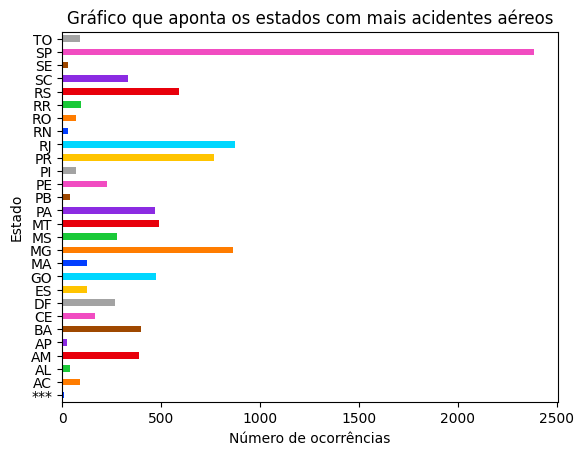

In [ ]:
ocor.groupby('ocorrencia_uf').size().plot(kind='barh', color=sns.color_palette('bright'))
plt.xlabel("Número de ocorrências")
plt.ylabel("Estado")
plt.title("Gráfico que aponta os estados com mais acidentes aéreos")
plt.show()

Text(0.5, 1.0, 'Gráfico que aponta as regiões com mais acidentes aéreos')

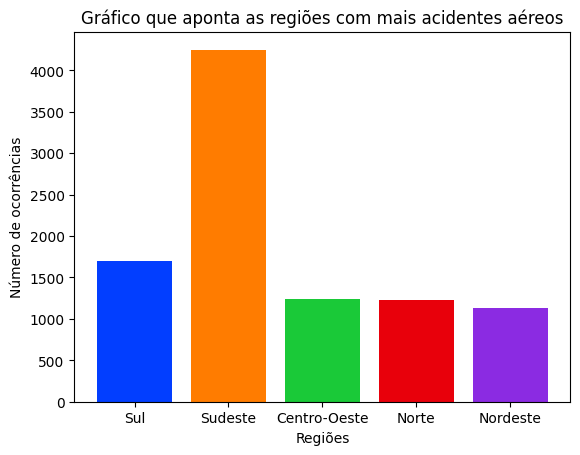

In [ ]:
sul=0
sudeste=0
centro_oeste=0
norte=0
nordeste=0

for i in ocor['ocorrencia_uf']:
  if i == 'RS' or i == 'SC' or i == 'PR':
    sul += 1
  elif i == 'SP' or i == 'RJ' or i == 'MG' or i == 'ES':
    sudeste += 1
  elif i=='MT' or i== 'MS' or i== 'GO':
    centro_oeste+=1
  elif i=='MA' or i=='RN' or i=='PI' or i=='CE' or i=='PB' or i=='PE' or i=='AL' or i=='BA' or i=='SE':
    nordeste+=1
  elif i=='AC' or i=='AM' or i=='RO' or i=='RR' or i=='PA' or i=='TO' or i=='AP':
    norte+=1

regioes = ['Sul', 'Sudeste', 'Centro-Oeste', 'Norte', 'Nordeste']
valores = [sul, sudeste, centro_oeste, norte, nordeste]
plt.bar(regioes, valores, color=sns.color_palette('bright'))
plt.xlabel("Regiões")
plt.ylabel("Número de ocorrências")
plt.title("Gráfico que aponta as regiões com mais acidentes aéreos")



#Análise referente à pergunta 1:

É possível observar que a maior parte dos acidentes aéreos ocorre na região Sudeste, principalmente no estado de São Paulo. Um dos possíveis motivos para que isso ocorra é a alta concetração de voos que tem como partida ou destino final os estados da região sudeste do Brasil, que é a região que concentra mais de 40% da população do país (segundo dados do Censo de 2022) e, também, é o polo econômico do Brasil.


#Pergunta 2:

Qual horário ocorrem mais acidentes aéreos. Eles são mais comuns no período da manhã, da tarde ou da noite?

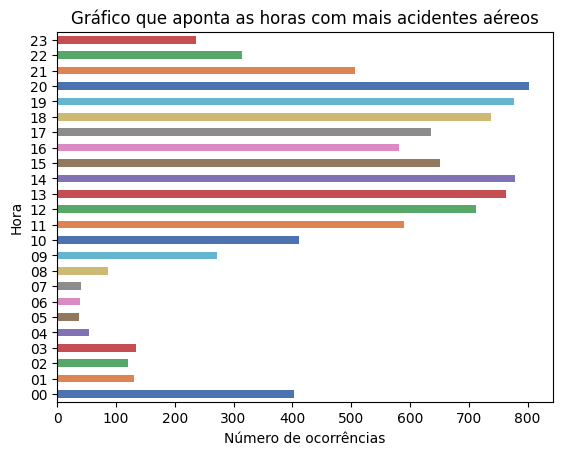

In [ ]:
ocorrencia_hora = ocor['ocorrencia_hora'].str.split(':').str[0]

hora_contagem = ocorrencia_hora.value_counts().sort_index()

hora_contagem.plot(kind='barh', color=sns.color_palette('deep'))

plt.xlabel("Número de ocorrências")
plt.ylabel("Hora")
plt.title("Gráfico que aponta as horas com mais acidentes aéreos")
plt.show()

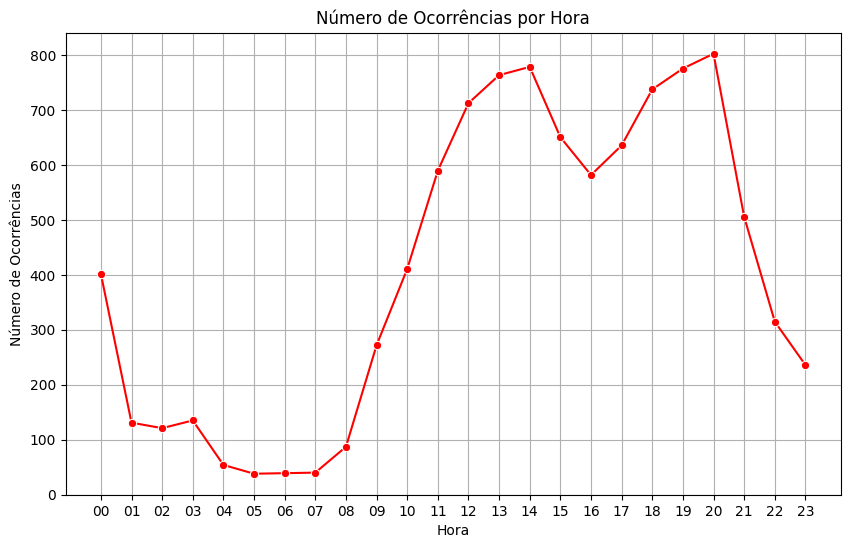

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=hora_contagem.index, y=hora_contagem.values, marker='o', color='red')

plt.title("Número de Ocorrências por Hora")
plt.xlabel("Hora")
plt.ylabel("Número de Ocorrências")
plt.grid(True)
plt.show()

<ipython-input-95-d498d107212a>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  madrugada+=hora_contagem[i]
<ipython-input-95-d498d107212a>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  manha+=hora_contagem[i]
<ipython-input-95-d498d107212a>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tarde+=hora_contagem[i]
<ipython-input-95-d498d107212a>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a

Text(0.5, 1.0, 'Gráfico que aponta os períodos do dia com mais acidentes aéreos')

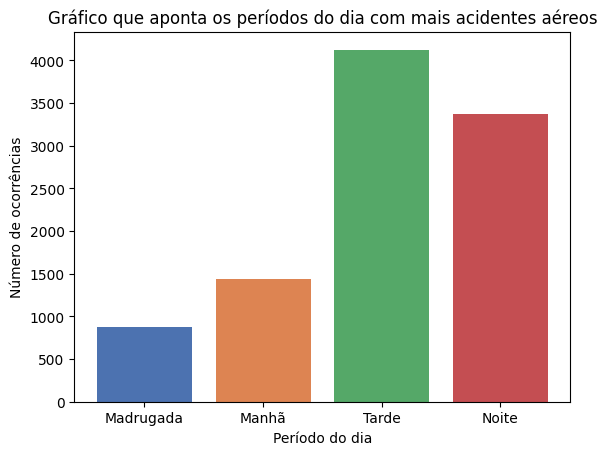

In [ ]:
madrugada=0
manha=0
tarde=0
noite=0
for i in hora_contagem.index.astype(int):
  if i<6:
    madrugada+=hora_contagem[i]
  elif i<12:
    manha+=hora_contagem[i]
  elif i<18:
    tarde+=hora_contagem[i]
  else:
    noite+=hora_contagem[i]

partes_dia = ['Madrugada', 'Manhã', 'Tarde', 'Noite']
valores = [madrugada, manha, tarde, noite]
plt.bar(partes_dia, valores, color=sns.color_palette('deep'))
plt.xlabel("Período do dia")
plt.ylabel("Número de ocorrências")
plt.title("Gráfico que aponta os períodos do dia com mais acidentes aéreos")


#Análise referente à pergunta 2:

Nota-se que a maior parte dos acidentes aéreos ocorre na parte da tarde e da noite. Além disso, nota-se que por volta das 20 horas é o período em que ocorre o maior número de acidentes aéreos.

Um dos possíveis motivos para tais fatos ocorrerem é que os períodos do dia em que ocorrem mais acidentes aéreos são, também, os que mais ocorrem voos.


#Pergunta 3:

Qual nível de dano médio encontrado em tais acidentes?

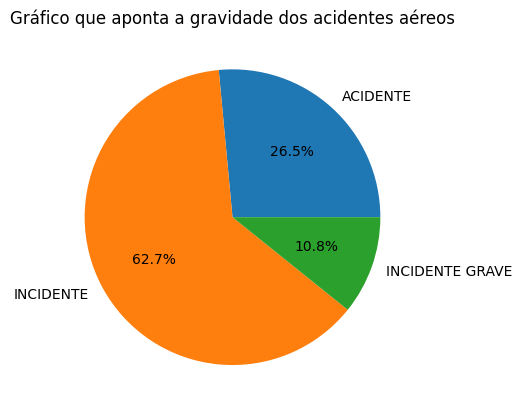

In [ ]:
ocor.groupby('ocorrencia_classificacao').size().plot(kind='pie', color=sns.color_palette('pastel'), autopct='%1.1f%%')
plt.title("Gráfico que aponta a gravidade dos acidentes aéreos")
plt.show()

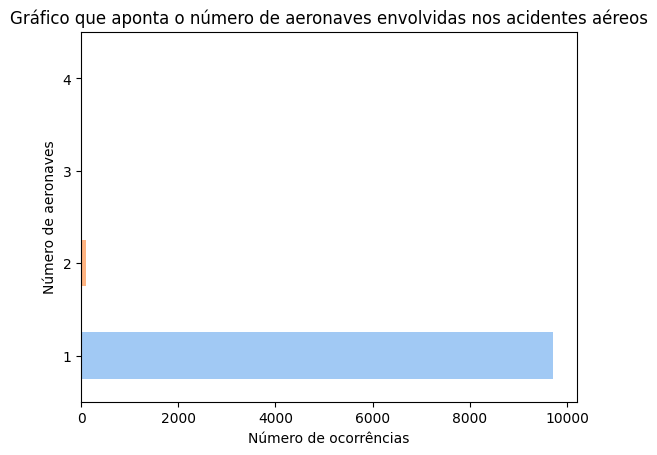

In [ ]:
ocor.groupby('total_aeronaves_envolvidas').size().plot(kind='barh', color=sns.color_palette('pastel'))
plt.xlabel("Número de ocorrências")
plt.ylabel("Número de aeronaves")
plt.title("Gráfico que aponta o número de aeronaves envolvidas nos acidentes aéreos")
plt.show()

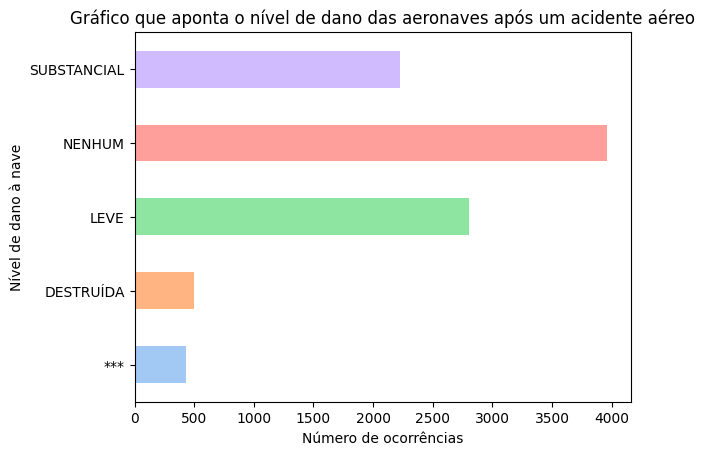

In [ ]:
aero.groupby('aeronave_nivel_dano').size().plot(kind='barh', color=sns.color_palette('pastel'))
plt.xlabel("Número de ocorrências")
plt.ylabel("Nível de dano à nave")
plt.title("Gráfico que aponta o nível de dano das aeronaves após um acidente aéreo")
plt.show()

#Análise referente à pergunta 3:

Em primeira análise, é notório que, diferentemente do senso comum, a maioria dos acidentes aéreos não são muito graves, sendo classificados em sua maioria como incidentes e gerando nenhum ou um leve dano à aeronave.

Entretanto, o número de acidentes aéreos graves não é irrelevante. Nesse sentido, observa-se que o número de aeronaves danificadas substancialmente foi de quase 2500 e o número de aeronaves destruídas foi de aproximadamente 500.

Por fim, nota-se que acidentes que envolvem mais de uma aeronave são extremamente raros.


#Pergunta 4:

Qual tipo de motor utilizado na maioria das aeronaves acidentadas?

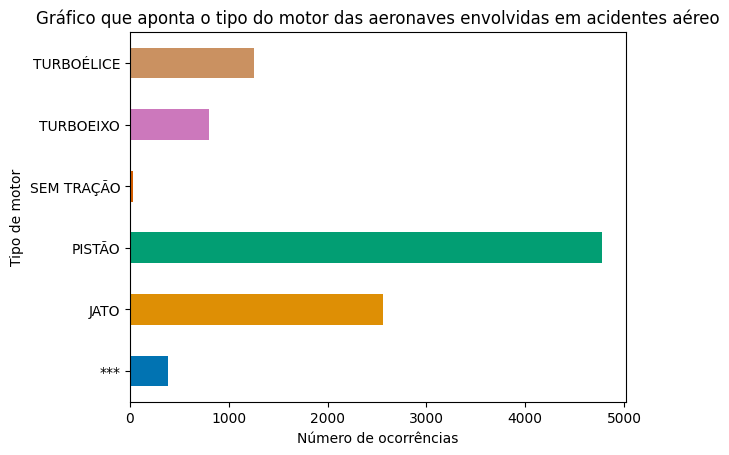

In [ ]:
aero.groupby('aeronave_motor_tipo').size().plot(kind='barh', color=sns.color_palette('colorblind'))
plt.xlabel("Número de ocorrências")
plt.ylabel("Tipo de motor")
plt.title("Gráfico que aponta o tipo do motor das aeronaves envolvidas em acidentes aéreo")
plt.show()

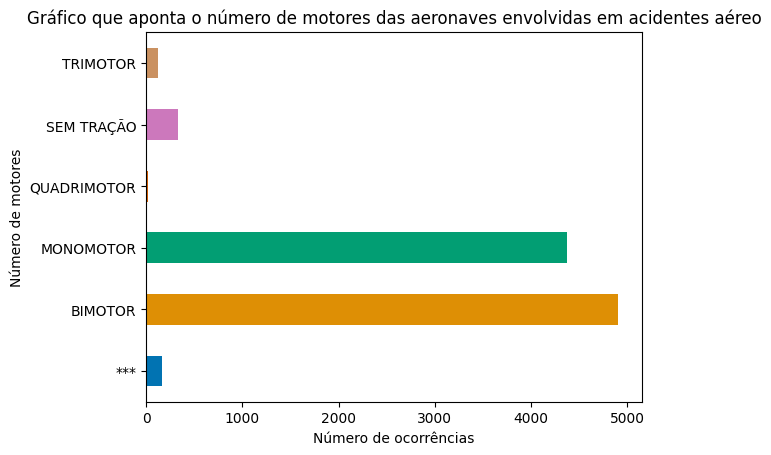

In [ ]:
aero.groupby('aeronave_motor_quantidade').size().plot(kind='barh', color=sns.color_palette('colorblind'))
plt.xlabel("Número de ocorrências")
plt.ylabel("Número de motores")
plt.title("Gráfico que aponta o número de motores das aeronaves envolvidas em acidentes aéreo")
plt.show()

#Análise referente à pergunta 4:

A maioria dos acidentes aéreos envolvem motores a pistão, que são mais antigos e menos tecnológicos comparados aos motores a jato.

Além disso, aeronaves bimotoras foram as que mais foram envolvidas em acidentes aéreos.



#Pergunta 5:

Qual aspecto foi responsável pelo maior número de acidentes?

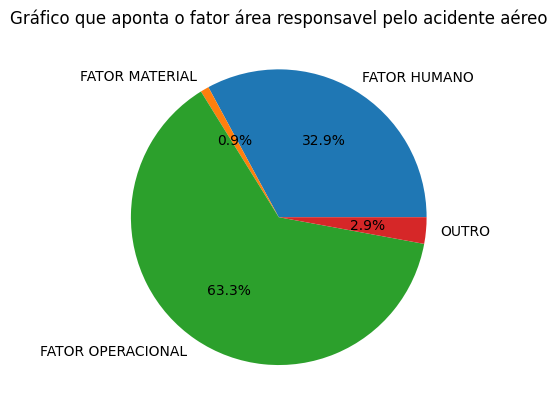

In [ ]:
fc.groupby('fator_area').size().plot(kind='pie', color=sns.palettes.mpl_palette('Dark2'), autopct='%1.1f%%')
plt.title("Gráfico que aponta o fator área responsavel pelo acidente aéreo")
plt.show()

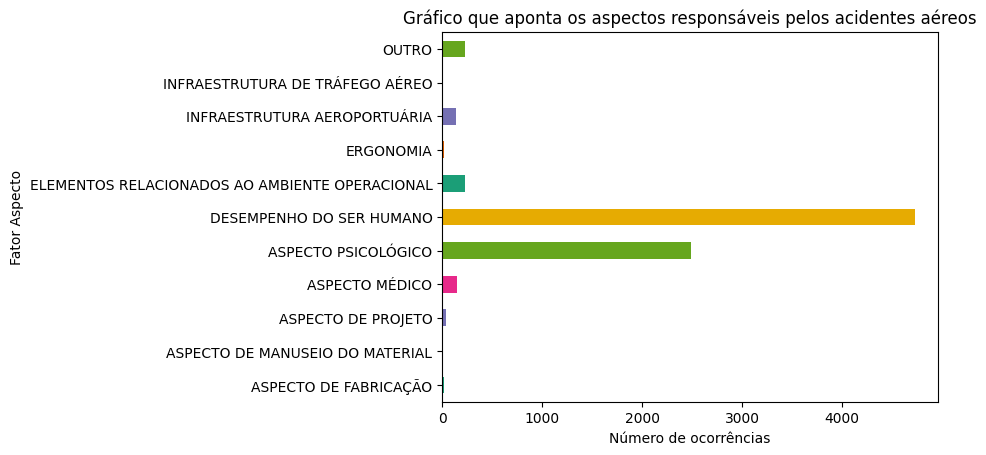

In [ ]:
fc.groupby('fator_aspecto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel("Número de ocorrências")
plt.ylabel("Fator Aspecto")
plt.title("Gráfico que aponta os aspectos responsáveis pelos acidentes aéreos")
plt.show()

#Análise refente à pergunta 5:

É possível observar que o desempenho humano e o aspecto psicológico são os principais aspectos responsáveis pelos acidentes aéreos. Nesse sentido, pode-se deduzir que o treinamento dos pilotos, tanto no sentido operacional quanto psicológico, deve ser mais rígido e profundo.

#Segunda parte da tarefa

Agora, utilizaremos o ChatGPT para responder as perguntas feitas ao dataset. A análise feita pode ser encontrada no seguinte link:

https://docs.google.com/document/d/1U3VCOecDdrdDGxVsjz2Ieeo71NHxufLs4REggH0jh9Y/edit?usp=sharing


#Terceira parte da tarefa: Comparação das abordagens

Nota-se que a abordagem utilizada pelo ChatGPT para responder às perguntas é muito parecida com a utilizada na EDA, uma vez que ele utiliza dados, principalmente do Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA), para basear as suas respostas. Dessa forma, o ChatGPT consegue produzir conclusões e respostas que se assemelham às análises feitas pelo EDA.

Entretanto, o ChatGPT não produz formas de visualização dos dados como o EDA, fazendo com que a análise do EDA possa ser mais útil e completa, já que as formas de visualização contribuem no entendimento das análises pelo público.



